#Lectura y procesamiento de los resultados de los mejores modelos LSTM

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de LSTM. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/lstm/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/lstm


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsLSTM2S = pd.read_excel('grilla_LSTM_NARMAX_2STEPS.xlsx', header=0)
summaryModelsLSTM4S = pd.read_excel('grilla_LSTM_NARMAX_4STEPS.xlsx', header=0)
summaryModelsLSTM8S = pd.read_excel('grilla_LSTM_NARMAX_8STEPS.xlsx', header=0)
summaryModelsLSTM16S = pd.read_excel('grilla_LSTM_NARMAX_16STEPS.xlsx', header=0)
summaryModelsLSTMMC = pd.read_excel('grilla_LSTM_NARMAX_2STEPS_MultiCapas.xlsx', header=0)

grilla_LSTM_NARMAX_AQP = pd.concat([summaryModelsLSTM2S, summaryModelsLSTM4S], ignore_index=True)
grilla_LSTM_NARMAX_AQP = pd.concat([grilla_LSTM_NARMAX_AQP, summaryModelsLSTM8S], ignore_index=True)
grilla_LSTM_NARMAX_AQP = pd.concat([grilla_LSTM_NARMAX_AQP, summaryModelsLSTM16S], ignore_index=True)

grilla_LSTM_NARMAX_AQP_MC = pd.concat([grilla_LSTM_NARMAX_AQP, summaryModelsLSTMMC], ignore_index=True)

grilla_LSTM_NARMAX_AQP_MC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     707 non-null    float64
 1   delayedSteps            707 non-null    int64  
 2   nameModel               707 non-null    object 
 3   nameHistory             707 non-null    object 
 4   nameConfiguration       707 non-null    object 
 5   timeTrain (in seconds)  707 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 33.3+ KB


##La cantidad de modelos generados para el LSTM NARX de AQP fue de 707

In [4]:
rslt_df = grilla_LSTM_NARMAX_AQP_MC.sort_values('MAE')
total = grilla_LSTM_NARMAX_AQP_MC['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_LSTM_NARMAX_AQP_MC.describe()

Tiempo total: 346374.29


MAE  delayedSteps  timeTrain (in seconds)
count  707.000000    707.000000              707.000000
mean     0.320742      5.691655              489.921202
std      0.030473      4.587330              495.992265
min      0.279104      2.000000               68.400000
25%      0.306367      2.000000              262.630000
50%      0.315758      4.000000              356.370000
75%      0.325765      8.000000              476.495000
max      0.485316     16.000000             4101.800000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 346374, lo que equivale a 92 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:50,:]

MAE  ...  timeTrain (in seconds)
291  0.279104  ...                  364.54
339  0.279202  ...                 1061.20
321  0.280164  ...                  402.71
315  0.280486  ...                  431.46
337  0.280533  ...                  925.75
363  0.281440  ...                 2098.75
289  0.282062  ...                  339.79
365  0.282139  ...                 2075.99
345  0.282323  ...                  895.98
341  0.283348  ...                  945.98
317  0.283711  ...                  476.24
297  0.283822  ...                  324.20
293  0.284069  ...                  370.59
313  0.284071  ...                  402.53
369  0.285631  ...                 2096.73
375  0.285975  ...                 2046.72
327  0.286402  ...                  384.32
243  0.287470  ...                  677.04
241  0.287682  ...                  667.08
197  0.288538  ...                  257.81
217  0.288844  ...                  325.55
195  0.289200  ...                  271.79
351  0.289227  ...                  926.59
225  0.289233  ...                  299.76
219  0.290145  ...                  319.44
303  0.290375  ...                  356.07
267  0.290438  ...                 1396.32
265  0.290465  ...                 1379.50
249  0.290540  ...                  629.30
245  0.290599  ...                  656.80
269  0.290610  ...                 1458.47
193  0.290967  ...                  269.03
699  0.291042  ...                  481.42
381  0.291149  ...                 3969.46
273  0.291292  ...                 1277.01
221  0.292128  ...                  318.80
231  0.292215  ...                  317.35
701  0.292324  ...                  496.92
338  0.292526  ...                 1004.25
201  0.292681  ...                  261.45
675  0.292780  ...                  470.94
290  0.293103  ...                  382.41
279  0.293108  ...                 1330.47
207  0.293467  ...                  265.25
697  0.293757  ...                  452.33
255  0.294330  ...                  648.49
383  0.294386  ...                 3633.42
216  0.295136  ...                  339.47
677  0.295140  ...                  430.47
379  0.295302  ...                 3565.55

[50 rows x 6 columns]

In [6]:
rslt_df.iloc[0,:]

MAE                                                                0.279104
delayedSteps                                                             16
nameModel                 results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid...
nameHistory               results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid...
nameConfiguration         results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid...
timeTrain (in seconds)                                               364.54
Name: 291, dtype: object

In [7]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAE                                                                0.279104
delayedSteps                                                             16
nameModel                 results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid...
nameHistory               results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid...
nameConfiguration         results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid...
timeTrain (in seconds)                                               364.54
Name: 291, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_history.npy
results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_config.npy
results/LSTM_1647_1_32_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S.h5


In [9]:
#para recuperar history
history=np.load('LSTM_1647_1_32_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_history.npy',allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load('LSTM_1647_1_32_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S_config.npy',allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model('LSTM_1647_1_32_sigmoid_sigmoid_sigmoid_mean_absolute_error_16S.h5')
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [0.2806016504764557, 0.274423748254776, 0.27153539657592773, 0.26838061213493347, 0.26547905802726746, 0.2622314989566803, 0.2590658962726593, 0.2561887204647064, 0.2526397407054901, 0.250591903924942, 0.24765001237392426, 0.2458760142326355, 0.24407602846622467, 0.2432512491941452, 0.24153326451778412, 0.23908303678035736, 0.23789389431476593, 0.23711208999156952, 0.23516282439231873, 0.2338925451040268, 0.23276428878307343, 0.23197080194950104, 0.231049045920372, 0.22934769093990326, 0.22838464379310608, 0.22796224057674408, 0.22679927945137024, 0.22555626928806305, 0.22420911490917206, 0.22353260219097137, 0.22300325334072113, 0.22262969613075256, 0.22194266319274902, 0.22030705213546753, 0.2208487093448639, 0.21878083050251007, 0.21755404770374298, 0.217342346906662, 0.21673375368118286, 0.21595634520053864, 0.21562069654464722, 0.21516135334968567, 0.21404454112052917, 0.21324405074119568, 0.2132931351661682, 0.21297186613082886, 0.21144382655620575, 0.21089054644107819, 

In [10]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledLSTM.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledLSTM.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxLSTM.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxLSTM.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF



def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

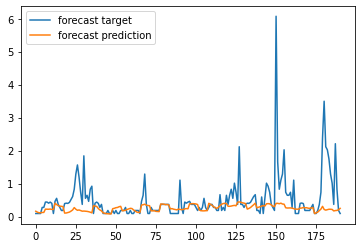

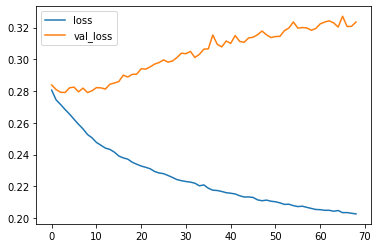

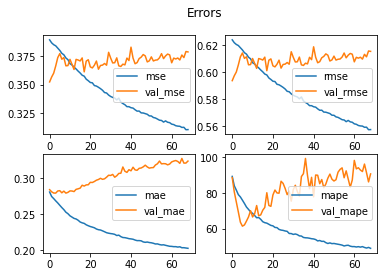

In [11]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
validation_predictions = saved_model.predict(testXScaled[:191,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)

##Generar data para NARMAX

In [ ]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 45):
  cont = 0
  X = list()
  y = list()
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  valuesScaled = dataScaled.values
  chunk_idsS = np.unique(valuesScaled[:, 0])

  for i in range(chunk_ids.shape[0]):
    #if cont == 1:
      #break
    rows = data.loc[(data['chunkID'] == chunk_ids[i])]
    rowsScaled = dataScaled.loc[(dataScaled['chunkID'] == chunk_idsS[i])]
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    contInterno = 0
    for _, row in rows.iterrows():
      #if contInterno == 1:
        #break
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        #Se agrega la salida esperada sin escalar
        salidaAux = rows.iloc[indexTarget, columnTarget]
        #y.append(salidaAux)
        xAux = rowsScaled.iloc[indexAux:end_row, :].values
        xAux = xAux.reshape(1,xAux.shape[0],xAux.shape[1])
        #print(type(xAux))
        #print(xAux.shape)
        #print(xAux)
        #X.append(xAux)
        prediction = float(saved_model.predict(xAux))
        #print(type(prediction))
        #print(type(salidaAux))
        error = calculate_error(salidaAux, prediction)
        posicionS = rowsScaled.iloc[indexTarget, 1]
        posicion = rows.iloc[indexTarget, 1]
        #print("Posicion: " + str(posicion))
        #print("Prediction: " + str(prediction))
        #print("salidaAux: " + str(salidaAux))
        #print("Error: " + str(error))
        dataNarmaxScaled.loc[(dataNarmaxScaled['chunkID'] == chunk_idsS[i]) & (dataNarmaxScaled['position_within_chunk'] == posicionS), 'error'] = error
        dataNarmax.loc[(dataNarmax['chunkID'] == chunk_ids[i]) & (dataNarmax['position_within_chunk'] == posicion), 'error'] = error
      contInterno = contInterno + 1  
      indexAux = indexAux + 1
    cont = cont + 1
  
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled


In [ ]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 24, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 24, saved_model)

In [ ]:
dataTrainNarmax.to_csv('dataTrainNarmaxLSTM.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledLSTM.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxLSTM.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledLSTM.csv', index = False)

In [ ]:
dataTrainNarmax.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
27      1.0                   28.0       0.092022  0.161323
28      1.0                   29.0       0.092022  0.150142
29      1.0                   30.0       0.092022  0.174975
30      1.0                   31.0       0.092022  0.207327
31      1.0                   32.0       0.092022  0.234012
32      1.0                   33.0       0.092022  0.243267
33      1.0                   34.0       0.184045  0.143667
34      1.0                   35.0       0.276067  0.029341
35      1.0                   36.0       0.606164  0.239085
36      1.0                   37.0       0.663358  0.202720
37      1.0                   38.0       0.644848  0.094081
38      1.0                   39.0       1.104268  0.522472
39      1.0                   40.0       0.736179  0.156605
40      1.0                   41.0       0.184045  0.372401
41      1.0                   42.0       0.092022  0.437162
42      1.0                   43.0       0.092022  0.383069
43      1.0                   44.0       0.552134  0.146528
44      1.0                   45.0       0.920223  0.576992
45      1.0                   46.0       0.552134  0.242161
46      1.0                   47.0       0.276067  0.020654
47      1.0                   48.0       0.092022  0.205041
48      1.0                   49.0       0.439351  0.141280
49      1.0                   50.0       0.092022  0.211769
50      1.0                   51.0       0.092022  0.212863
51      1.0                   52.0       0.184045  0.124266
52      1.0                   53.0       0.092022  0.205245
53      1.0                   54.0       0.092022  0.209887
54      1.0                   55.0       0.092022  0.212615
55      1.0                   56.0       0.092022  0.210644
56      1.0                   57.0       0.184045  0.114158
57      1.0                   58.0       0.920223  0.622242
58      1.0                   59.0       0.736179  0.383611
59      1.0                   60.0       1.196290  0.774603
60      1.0                   61.0       1.748424  1.262596
61      1.0                   62.0       3.496849  2.966075
62      1.0                   63.0       2.024491  1.458483
63      1.0                   64.0       1.104268  0.539410
64      1.0                   65.0       0.736179  0.205574
65      1.0                   66.0       0.828201  0.343857
66      1.0                   67.0       0.368089  0.062733
67      1.0                   68.0       0.368089  0.026892
68      1.0                   69.0       0.184045  0.187652
69      1.0                   70.0       0.184045  0.174033
70      1.0                   71.0       0.184045  0.159023
71      1.0                   72.0       0.184045  0.143712
72      1.0                   73.0       0.368089  0.043513
73      1.0                   74.0       0.368089  0.055629
74      1.0                   75.0       0.368089  0.064269
75      1.0                   76.0       0.276067  0.006369
76      1.0                   77.0       0.184045  0.083541

In [ ]:
dataTestNarmax.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
27       1.0                  148.0       0.092022  0.094777
28       1.0                  149.0       0.092022  0.107925
29       1.0                  150.0       0.092022  0.133890
30       1.0                  151.0       0.092022  0.149791
31       1.0                  152.0       0.092022  0.161121
32       1.0                  153.0       0.398325  0.136350
33       1.0                  154.0       0.428488  0.152091
34       1.0                  155.0       0.520786  0.213764
35       1.0                  156.0       0.184045  0.204295
36       1.0                  157.0       0.460112  0.005416
37       1.0                  158.0       0.552134  0.026669
38       1.0                  159.0       0.368089  0.177035
39       1.0                  160.0       0.368089  0.164877
40       1.0                  161.0       0.276067  0.227312
41       1.0                  162.0       0.184045  0.269269
42       1.0                  163.0       0.184045  0.225592
43       1.0                  164.0       0.184045  0.189426
44       1.0                  165.0       0.092022  0.241458
45       1.0                  166.0       0.460112  0.145827
46       1.0                  167.0       1.104268  0.801239
47       1.0                  168.0       0.736179  0.443375
48       1.0                  169.0       0.184045  0.103684
49       1.0                  170.0       0.405162  0.114046
50       1.0                  171.0       0.438234  0.150773
51       1.0                  172.0       0.399484  0.137048
52       1.0                  173.0       0.409662  0.163357
53       1.0                  174.0       0.393647  0.151175
54       1.0                  175.0       0.393286  0.148560
55       1.0                  176.0       0.092022  0.156939
56       1.0                  177.0       0.092022  0.175778
57       1.0                  178.0       1.104268  0.821621
58       1.0                  179.0       1.840447  1.509346
59       1.0                  180.0       2.024491  1.667666
60       1.0                  181.0       0.920223  0.529212
61       1.0                  182.0       0.552134  0.160061
62       1.0                  183.0       0.368089  0.044053
63       1.0                  184.0       0.184045  0.213404
64       1.0                  185.0       0.092022  0.277186
65       1.0                  186.0       0.092022  0.250607
66       1.0                  187.0       0.092022  0.207739
67       1.0                  188.0       0.092022  0.175011
68       1.0                  189.0       0.092022  0.152751
69       1.0                  190.0       0.092022  0.162888
70       1.0                  191.0       0.276067  0.013188
71       1.0                  192.0       0.276067  0.023604
99       2.0                  148.0       0.460112  0.182527
100      2.0                  149.0       0.368089  0.077004
101      2.0                  150.0       0.552134  0.231471
102      2.0                  151.0       1.748424  1.384662
103      2.0                  152.0       2.668648  2.263536

In [ ]:
print("trainDFScaled.shape = " + str(trainDFScaled.shape))
print("trainDF.shape = " + str(trainDF.shape))
print("testDFScaled.shape = " + str(testDFScaled.shape))
print("testDF.shape = " + str(testDF.shape))
#print("trainXScaled.shape = " + str(trainXScaled.shape))
#print("trainY.shape = " + str(trainY.shape))

trainDFScaled.shape = (24600, 46)
trainDF.shape = (24600, 46)
testDFScaled.shape = (14760, 46)
testDF.shape = (14760, 46)


In [ ]:
print("dataTrainNarmax.shape = " + str(dataTrainNarmax.shape))
print("dataTrainNarmaxScaled.shape = " + str(dataTrainNarmaxScaled.shape))
print("dataTestNarmax.shape = " + str(dataTestNarmax.shape))
print("dataTestNarmaxScaled.shape = " + str(dataTestNarmaxScaled.shape))

dataTrainNarmax.shape = (19065, 47)
dataTrainNarmaxScaled.shape = (19065, 47)
dataTestNarmax.shape = (9225, 47)
dataTestNarmaxScaled.shape = (9225, 47)
